<div>
    <h1>
    <img src="alabsai_logo.png" alt="Alabs logo", style="width:115px; float: left;">
    Supply Chain and Inventory <br>
    Case Study
   </h1>
    <h3> &nbsp; Prepared by Roderick Anthony</h3><br>
</div>

### **DataCo. Global** is a Logistics company with market all over the world. The supply-chain & Inventory Data is available. The same is to be analysed for insights and recommendation to aid the respective business decisions.

## Part 2:  Visualizations, more EDA and some ML Experimentation
### <code>`This notebook has also been used as a test laboratory for the accompanying Dashboard`</code>

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
from scipy.stats import chi2_contingency

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)

In [2]:
df_sales = pd.read_csv('sales_data_clean.csv', parse_dates=[19,26])
df_inventory = pd.read_csv('Inventory_Stock_Data.csv')

In [3]:
# Getting rid of spaces in df_inventory column names

col_rename = {col: col.replace(' ','_') for col in df_inventory.columns}
df_inventory.rename(columns = col_rename, inplace = True)

In [4]:
df_sales.head(2)

,Unnamed: 0,Product_Category_Id,Category_Name,Class,Customer_City,Customer_Country,Customer_Fname,Customer_Id,Customer_Lname,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode,Delivery_Status,Department_Id,Department_Name,Market,Order_City,Order_Country,Order_Date,Order_Id,Order_Region,Order_State,Order_Status,Product_Id,Product_Name,Ship_Date,Shipping_Mode,Type,Benefit_per_order,Shipment_days_scheduled,Shipment_days_real,Latitude,Longitude,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Order_Item_Total,Sales,Late_Delivery_Risk,Order_year,Order_quarter,Order_month,Order_week,Order_day,Ship_year,Ship_quarter,Ship_month,Ship_week,Ship_day,Order_cntry_alpha3,is_late
0,0,24,Women's Apparel,Moderate Value-Moderate Number,Roswell,EE. UU.,Jean,5673,Dunn,Corporate,NM,8837 Blue Hills Harbour,88201.0,Late,5,Golf,LATAM,Tlalpan,Mexico,2017-02-26 17:17:00,53963,Central America,Distrito Federal,Pending Payment,502,Nike Men's Dri-FIT Victory Golf Polo,2017-03-02 17:17:00,Second Class,PAYMENT,9.61,2,4,33.425201,-104.522080,15.0,0.15,134920,50.0,0.11,2,85.0,100.0,Late,2017,1,February,8,Sunday,2017,1,March,9,Thursday,MEX,True
1,1,24,Women's Apparel,Moderate Value-Moderate Number,Los Angeles,EE. UU.,Rose,9723,White,Corporate,CA,1396 Silver Berry Impasse,90024.0,Late,5,Golf,LATAM,Soyapango,El Salvador,2015-02-27 00:47:00,3908,Central America,San Salvador,Pending Payment,502,Nike Men's Dri-FIT Victory Golf Polo,2015-03-03 00:47:00,Second Class,PAYMENT,9.49,2,4,34.034836,-118.260025,16.0,0.16,9722,50.0,0.11,2,84.0,100.0,Late,2015,1,February,9,Friday,2015,1,March,10,Tuesday,SLV,True


In [5]:
df_sales.drop(columns=['Unnamed: 0'], inplace=True)

In [15]:
metrics=['Benefit_per_order', 'Sales', 'is_late']
aggs={'Benefit_per_order':'sum', 'Sales':'sum', 'is_late':'mean'}

df_yearly=df_sales.groupby('Order_year')[metrics].agg(aggs).reset_index()
# world_map_data=pd.concat(world_map_data, df_sales.Order_Country.value_counts(), axis=1)
df_yearly=pd.merge(df_yearly,df_sales.Order_year.value_counts(), left_on='Order_year', right_index=True)
df_yearly.drop(columns=['Order_year_x'], inplace=True)
df_yearly.Benefit_per_order = df_yearly.Benefit_per_order.astype('int')
df_yearly.Sales = df_yearly.Sales.astype('int')
df_yearly.is_late = df_yearly.is_late*100
rename={'Order_year':'Year', 'Benefit_per_order':'Profit', 
        'is_late':'Late Deliveries%', 'Order_year_y':'Total Orders'}
df_yearly.rename(columns=rename, inplace=True)
df_yearly

,Year,Profit,Sales,Late Deliveries%,Total Orders
0,2015,1318856,12340831,54.863528,62650
1,2016,1310119,12303817,55.069544,62550
2,2017,1304085,11808436,54.447703,53196
3,2018,33841,331650,56.288271,2123


In [16]:
metrics=['Benefit_per_order', 'Sales', 'Shipment_days_real', 'is_late']
aggs={'Benefit_per_order':'sum', 'Sales':'sum', 'Shipment_days_real':'mean', 'is_late':'mean'}

world_map_data=df_sales.groupby(['Order_Country', 'Order_cntry_alpha3'])[metrics].agg(aggs).reset_index().round(4)
# world_map_data=pd.concat(world_map_data, df_sales.Order_Country.value_counts(), axis=1)
world_map_data=pd.merge(world_map_data,df_sales.Order_Country.value_counts(), left_on='Order_Country', right_index=True)
world_map_data.drop(columns=['Order_Country_x'], inplace=True)
world_map_data.Benefit_per_order = world_map_data.Benefit_per_order.astype('int')
world_map_data.Sales = world_map_data.Sales.astype('int')
world_map_data.is_late = world_map_data.is_late*100
world_map_data.Shipment_days_real = world_map_data.Shipment_days_real.round(2)
rename={'Order_Country':'Country', 'Order_cntry_alpha3':'alpha3', 'Benefit_per_order':'Profit', 
        'Shipment_days_real':'Avg Ship Days', 'is_late':'Late Deliveries%', 'Order_Country_y':'Total Orders'}
world_map_data.rename(columns=rename, inplace=True)

fig = px.choropleth(world_map_data, locations="alpha3",
                    color="Profit", 
                    hover_name="Country", 
                    hover_data=["Profit", "Sales", "Late Deliveries%", "Avg Ship Days", "Total Orders"],
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [17]:
print("Total revenue: ",str(df_sales.Sales.sum().round(2))+' $')
print("Units sold: ",str(df_sales.Order_Item_Quantity.sum()))
print("Current Stocked Units: ",str(df_inventory.current_stock.sum()))

result = pd.merge(df_inventory, df_sales[['Product_Id', 'Class', 'Order_Item_Product_Price']].drop_duplicates(), left_on="product_id", right_on='Product_Id')
result=result.assign(current_stock_value=result.current_stock*result.Order_Item_Product_Price)

print("Current Stocked Value: ",str(result.current_stock_value.sum().round(2))+' $\n')

print("Gross Profit: ",str(df_sales.Benefit_per_order.sum().round(2))+' $')
print("Distict Products: ",len(df_inventory))
print("Market Countries: ",str(df_sales.Order_Country.nunique()))
print("Late Deliveries",str((df_sales.Late_Delivery_Risk.value_counts()/len(df_sales)*100).round(2)[0])+' %')

Total revenue:  36784735.01 $
Units sold:  384079
Current Stocked Units:  18965
Current Stocked Value:  1592592.6 $

Gross Profit:  3966902.97 $
Distict Products:  118
Market Countries:  163
Late Deliveries 54.83 %


In [18]:
(df_sales.Late_Delivery_Risk.value_counts()/len(df_sales)*100).round(2)

Late        54.83
Not Late    45.17
Name: Late_Delivery_Risk, dtype: float64

In [19]:
(df_sales.Order_Status.value_counts()/len(df_sales)*100).round(2)

Complete           32.96
Pending Payment    22.07
Processing         12.13
Pending            11.20
Closed             10.87
On Hold             5.43
Suspected Fraud     2.25
Canceled            2.05
Payment Review      1.05
Name: Order_Status, dtype: float64

In [20]:
(df_sales.Delivery_Status.value_counts()/len(df_sales)*100).round(2)

Late        54.83
Advance     23.04
On time     17.84
Canceled     4.30
Name: Delivery_Status, dtype: float64

In [21]:
df_sales.head(2)

,Unnamed: 0,Product_Category_Id,Category_Name,Class,Customer_City,Customer_Country,Customer_Fname,Customer_Id,Customer_Lname,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode,Delivery_Status,Department_Id,Department_Name,Market,Order_City,Order_Country,Order_Date,Order_Id,Order_Region,Order_State,Order_Status,Product_Id,Product_Name,Ship_Date,Shipping_Mode,Type,Benefit_per_order,Shipment_days_scheduled,Shipment_days_real,Latitude,Longitude,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Order_Item_Total,Sales,Late_Delivery_Risk,Order_year,Order_quarter,Order_month,Order_week,Order_day,Ship_year,Ship_quarter,Ship_month,Ship_week,Ship_day,Order_cntry_alpha3,is_late
0,0,24,Women's Apparel,Moderate Value-Moderate Number,Roswell,EE. UU.,Jean,5673,Dunn,Corporate,NM,8837 Blue Hills Harbour,88201.0,Late,5,Golf,LATAM,Tlalpan,Mexico,2017-02-26 17:17:00,53963,Central America,Distrito Federal,Pending Payment,502,Nike Men's Dri-FIT Victory Golf Polo,2017-03-02 17:17:00,Second Class,PAYMENT,9.61,2,4,33.425201,-104.522080,15.0,0.15,134920,50.0,0.11,2,85.0,100.0,Late,2017,1,February,8,Sunday,2017,1,March,9,Thursday,MEX,True
1,1,24,Women's Apparel,Moderate Value-Moderate Number,Los Angeles,EE. UU.,Rose,9723,White,Corporate,CA,1396 Silver Berry Impasse,90024.0,Late,5,Golf,LATAM,Soyapango,El Salvador,2015-02-27 00:47:00,3908,Central America,San Salvador,Pending Payment,502,Nike Men's Dri-FIT Victory Golf Polo,2015-03-03 00:47:00,Second Class,PAYMENT,9.49,2,4,34.034836,-118.260025,16.0,0.16,9722,50.0,0.11,2,84.0,100.0,Late,2015,1,February,9,Friday,2015,1,March,10,Tuesday,SLV,True


In [22]:
df_inventory.head(2)

,order-now,product_id,product_name,avg_lead_time,avg_order_qty,current_stock,max_lead_time,max_order_qty,mod,reorder_point,safety_stock
0,green,19,Nike Men's Fingertrap Max Training Shoe,10,1,69,30,1,1,35,25
1,orange,24,Elevation Training Mask 2.0,10,3,175,30,5,0,175,144


In [23]:
df=df_sales.Delivery_Status.value_counts().reset_index().rename(columns={'index': 'Delivery Status', 'Delivery_Status': 'Total Entries'})
fig = px.pie(df, values='Total Entries', names='Delivery Status', title='Delivery Status', hole=.3)
fig.update_layout(autosize=False, height=360, width=360, margin=dict(l=10,r=10,b=10,t=50,pad=4))
fig.show()

In [24]:
df=df_sales.Late_Delivery_Risk.value_counts().reset_index().rename(columns={'index': 'Delivery Status', 'Late_Delivery_Risk': 'Total Entries'})
fig = px.pie(df, values='Total Entries', names='Delivery Status', title='Late Delivery Risk', hole=.3)
fig.update_layout(autosize=False, height=360, width=360, margin=dict(l=10,r=10,b=10,t=50,pad=4))
fig.show()

In [25]:
df=df_sales.Order_Status.value_counts().reset_index().rename(columns={'index': 'Order Status', 'Order_Status': 'Total Entries'})
fig = px.bar(df, x="Total Entries", y="Order Status", orientation='h')
fig.update_layout(autosize=False, height=360, margin=dict(l=10,r=10,b=10,t=50,pad=4))
fig.show()

---

### Trends across the timeline

In [26]:
df_sales.Order_Date = df_sales.Order_Date.apply(lambda x: x.date())

In [33]:
df=df_sales.groupby('Order_Date')['Order_Item_Quantity'].sum().reset_index().rename(columns={'Order_Date': 'Order Date', 'Order_Item_Quantity': 'Total Units Ordered'})

fig = px.line(df, x='Order Date', y="Total Units Ordered", title='Trend of Order Quantity')
fig.update_layout(autosize=False, height=350, width=1000, margin=dict(l=10,r=10,b=10,t=50,pad=4))
fig.update_traces(line_color='#456987')
fig.show()

In [66]:
# Reusing a function created in the other notebook

df_ = df_sales.copy()

def month_to_num(col):
    return col.apply(lambda x: dt.datetime.strptime(x, '%B').month)

num_to_month_dict = dict((str(i), dt.datetime.strptime(('0'+str(i))[-2:], '%m').strftime('%B')) for i in range(1,13))

df_.Order_month = month_to_num(df_.Order_month)

In [67]:
df_total_orders=pd.pivot_table(df_, values='Order_Item_Quantity', index=['Order_year'], columns=['Order_month', 'Order_week'], aggfunc=np.sum, fill_value=0).round(2)
col_index=[(num_to_month_dict[str(i)],week) for (i,week) in df_total_orders.columns]
df_total_orders.columns=pd.MultiIndex.from_tuples(col_index, names=["Order_month", "Order_week"])
df_total_orders

Order_month January                                    February              \
Order_week       1     2     3     4     5    52    53       5     6     7    
Order_year                                                                    
2015           1511  2533  2780  2731  2299    0     0      383  2552  2541   
2016           2535  2551  2685  2691     0    0  1135     2504  2590  2667   
2017           2539  2636  2728  2638   733  331     0     2062  2670  2670   
2018            479   480   479   480   205    0     0        0     0     0   

Order_month             March                              April              \
Order_week     8     9     9     10    11    12    13   14    13    14    15   
Order_year                                                                     
2015         2706  2256   457  2801  2621  2635  2650  898     0  1869  2678   
2016         2551   453  2269  2449  2553  2527  1551    0  1138  2575  2711   
2017         2906   762  1892  2701  2672  2510  1901    0   733  2637  2551   
2018            0     0     0     0     0     0     0    0     0     0     0   

Order_month                    May                                June        \
Order_week     16    17    18   17    18    19    20    21    22    22    23   
Order_year                                                                     
2015         2762  2492  1486    0  1145  2620  2697  2679  2761     0  2649   
2016         2773  2011     0  393  2530  2704  2644  2524   808  1829  2531   
2017         2712  2556     0    0  2554  2414  2451  2450  1164  1437  2311   
2018            0     0     0    0     0     0     0     0     0     0     0   

Order_month                         July                               August  \
Order_week     24    25    26   27    26    27    28    29    30    31     31   
Order_year                                                                      
2015         2468  2710  2534  842     0  1956  2646  2755  2570  1873    724   
2016         2494  2687  1467    0  1148  2632  2715  2596  2561     0   2656   
2017         2242  2523  1681    0   824  2520  2404  2597  2409   337   2158   
2018            0     0     0    0     0     0     0     0     0     0      0   

Order_month                              September                          \
Order_week     32    33    34    35   36        35    36    37    38    39   
Order_year                                                                   
2015         2599  2650  2527  2688  424         0  2273  2586  2639  2796   
2016         2592  2685  2573  1177    0      1451  2587  2826  2598  1822   
2017         2462  2425  2572  1478    0      1174  2469  2381  2413  2065   
2018            0     0     0     0    0         0     0     0     0     0   

Order_month       October                               November              \
Order_week     40      39    40    41    42    43    44       44    45    46   
Order_year                                                                     
2015         1072       0  1533  2670  2637  2553  2310      354  2729  2668   
2016            0     870  2495  2802  2693  2730   346     2271  2614  2673   
2017            0     333   582   479   480   479   137      343   479   480   
2018            0       0     0     0     0     0     0        0     0     0   

Order_month                  December                                
Order_week     47    48   49       48    49    50    51    52    53  
Order_year                                                           
2015         2715  2599  398        0  2220  2565  2637  2856  1512  
2016         2740  1195    0     1499  2716  2625  2663  2271     0  
2017          479   274    0      206   479   480   479   480     0  
2018            0     0    0        0     0     0     0     0     0

<h3 style="color:#9A1663;">As can be seen in the graph & verified in the table, quantity items sold drops rapidly towards the end of 2017 & beginning of 2018 worth noting</h3>

In [68]:
# del df_ # deleting the temporary variable

df=df_sales.groupby('Order_Date')['Sales'].sum().reset_index().rename(columns={'Order_Date': 'Order Date', 'Sales': 'Total Sales'})

fig = px.line(df, x='Order Date', y="Total Sales", title='Sales trend')
fig.update_layout(autosize=False, height=350, width=1000, margin=dict(l=10,r=10,b=10,t=50,pad=4))
fig.show()

In [69]:
df['Total Sales'].describe()

count      1127.000000
mean      32639.516427
std        8820.991095
min         767.719997
25%       31211.015633
50%       33580.501068
75%       36040.960716
max      103500.000000
Name: Total Sales, dtype: float64

<h3 style="color:#9A1663;">There are some evident fluctuations towards the end of 2017 & beginning of 2018 worth noting</h3>

In [70]:
df=df_sales.groupby('Order_Date')['Benefit_per_order'].sum().reset_index().rename(columns={'Order_Date': 'Order Date', 'Benefit_per_order': 'Profit'})

fig = px.line(df, x='Order Date', y="Profit", title='Profit trend')
fig.update_layout(autosize=False, height=350, width=1000, margin=dict(l=10,r=10,b=10,t=50,pad=4))
fig.show()

In [21]:
df.Profit.describe()

count     1127.000000
mean      3519.878415
std       1674.921779
min      -1390.340000
25%       2504.570010
50%       3566.800028
75%       4545.139948
max      16578.800159
Name: Profit, dtype: float64

In [71]:
df=df_sales.groupby('Order_Date')['is_late'].mean().reset_index().rename(columns={'Order_Date': 'Order Date', 'is_late': 'Late Deliveries%'})

fig = px.line(df, x='Order Date', y="Late Deliveries%", title='Late Deliveries trend')
fig.update_layout(autosize=False, height=350, width=1000, margin=dict(l=10,r=10,b=10,t=50,pad=4))
fig.show()

<h3 style="color:#9A1663;">The transactions contributing to the outlier peaks can further be explored, if needed</h3>

---

In [72]:
# Inventory units & total value by class

result = pd.merge(df_inventory, df_sales[['Product_Id', 'Class', 'Order_Item_Product_Price']].drop_duplicates(), left_on="product_id", right_on='Product_Id')
result=result.assign(current_stock_value=result.current_stock*result.Order_Item_Product_Price)
df1=result.groupby('Class')[['current_stock', 'current_stock_value']].sum()
df2=df_sales.groupby('Class')[['Sales', 'Order_Item_Quantity', 'Benefit_per_order']].sum()

df_class=pd.concat([df1, df2], axis=1).reset_index().rename(columns={'Order_Item_Quantity': 'Orders', 'Benefit_per_order': 'Profit', 'current_stock_value': 'Stock Value', 'current_stock': 'Stock'}).round()

fig_class = px.bar(df_class, x="Stock", y="Class", orientation='h',
             hover_data=['Sales', 'Orders', 'Profit'], color='Stock Value', height=400)
fig_class.show()

In [74]:
fig_class_sales = px.pie(df_class, values='Sales', names='Class', title='Sales by class', hole=.3)
fig_class_sales.update_layout(width=300, height=300, margin=dict(l=0,r=10,b=10,t=40, pad=4), showlegend=False)
fig_class_sales.show()

---

In [75]:
units_by_city=df_sales.groupby('Customer_City')[['Order_Item_Quantity', 'Sales', 'Benefit_per_order']].sum().sort_values(by='Order_Item_Quantity', ascending=False)
city_ordrs=df_sales.Customer_City.value_counts()
city_late=df_sales.groupby('Customer_City')['is_late'].mean()
city_df=pd.concat([units_by_city, city_ordrs, city_late], axis=1).reset_index().rename(columns={'index': 'City', 'Customer_City': 'Total Orders', 'Benefit_per_order': 'Profit'})
city_df=city_df.sort_values(by='Sales', ascending=False).head(10)

fig_city = px.bar(city_df, x="Total Orders", y="City", orientation='h',
             hover_data=['Sales', 'Profit', 'is_late'], color='Sales', height=400)
fig_city.show()

In [76]:
city_df

,City,Order_Item_Quantity,Sales,Profit,Total Orders,is_late
0,Caguas,142319,1.361027e+07,1.450507e+06,66770,0.547402
1,Chicago,8226,7.976142e+05,8.572592e+04,3885,0.565766
2,Los Angeles,7252,6.978874e+05,8.058482e+04,3417,0.543752
3,Brooklyn,7251,6.764198e+05,6.723187e+04,3412,0.531067
4,New York,3862,3.612171e+05,3.930214e+04,1816,0.552313
5,Philadelphia,3399,3.157055e+05,3.016309e+04,1577,0.552315
6,Bronx,3204,3.089050e+05,4.094477e+04,1500,0.549333
7,San Diego,3084,2.938305e+05,2.613364e+04,1437,0.534447
9,Miami,2751,2.703682e+05,3.548025e+04,1314,0.538052
8,Houston,2787,2.673479e+05,3.068453e+04,1297,0.530455


---

In [79]:
df_sales.head(2)

,Unnamed: 0,Product_Category_Id,Category_Name,Class,Customer_City,Customer_Country,Customer_Fname,Customer_Id,Customer_Lname,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode,Delivery_Status,Department_Id,Department_Name,Market,Order_City,Order_Country,Order_Date,Order_Id,Order_Region,Order_State,Order_Status,Product_Id,Product_Name,Ship_Date,Shipping_Mode,Type,Benefit_per_order,Shipment_days_scheduled,Shipment_days_real,Latitude,Longitude,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Order_Item_Total,Sales,Late_Delivery_Risk,Order_year,Order_quarter,Order_month,Order_week,Order_day,Ship_year,Ship_quarter,Ship_month,Ship_week,Ship_day,Order_cntry_alpha3,is_late
0,0,24,Women's Apparel,Moderate Value-Moderate Number,Roswell,EE. UU.,Jean,5673,Dunn,Corporate,NM,8837 Blue Hills Harbour,88201.0,Late,5,Golf,LATAM,Tlalpan,Mexico,2017-02-26,53963,Central America,Distrito Federal,Pending Payment,502,Nike Men's Dri-FIT Victory Golf Polo,2017-03-02 17:17:00,Second Class,PAYMENT,9.61,2,4,33.425201,-104.522080,15.0,0.15,134920,50.0,0.11,2,85.0,100.0,Late,2017,1,February,8,Sunday,2017,1,March,9,Thursday,MEX,True
1,1,24,Women's Apparel,Moderate Value-Moderate Number,Los Angeles,EE. UU.,Rose,9723,White,Corporate,CA,1396 Silver Berry Impasse,90024.0,Late,5,Golf,LATAM,Soyapango,El Salvador,2015-02-27,3908,Central America,San Salvador,Pending Payment,502,Nike Men's Dri-FIT Victory Golf Polo,2015-03-03 00:47:00,Second Class,PAYMENT,9.49,2,4,34.034836,-118.260025,16.0,0.16,9722,50.0,0.11,2,84.0,100.0,Late,2015,1,February,9,Friday,2015,1,March,10,Tuesday,SLV,True


In [81]:
units_by_country=df_sales.groupby('Order_Country')[['Order_Item_Quantity', 'Sales', 'Benefit_per_order']].sum().sort_values(by='Order_Item_Quantity', ascending=False)
cntry_ordrs=df_sales.Order_Country.value_counts()
cntry_late=df_sales.groupby('Order_Country')['is_late'].mean()*100
cntry_df=pd.concat([units_by_country, cntry_ordrs, cntry_late], axis=1).reset_index().rename(columns={'index': 'Country', 'Order_Country': 'Total Orders', 'Benefit_per_order': 'Profit', 'is_late': 'Late Delivery%'})
cntry_df=cntry_df.sort_values(by='Sales', ascending=False).head(10).round(2)

fig_cntry = px.bar(cntry_df, x="Total Orders", y="Country", orientation='h',
             hover_data=['Sales', 'Profit', 'Late Delivery%'], color='Late Delivery%', height=400)
fig_cntry.update_layout(autosize=False, height=350, width=1000, margin=dict(l=10,r=10,b=10,t=10,pad=4))
fig_cntry.show()

In [82]:
units_by_country=df_sales.groupby('Order_Country')[['Order_Item_Quantity', 'Sales', 'Benefit_per_order']].sum().sort_values(by='Order_Item_Quantity', ascending=False)
cntry_ordrs=df_sales.Order_Country.value_counts()
cntry_late=df_sales.groupby('Order_Country')['is_late'].mean()*100
cntry_df=pd.concat([units_by_country, cntry_ordrs, cntry_late], axis=1).reset_index().rename(columns={'index': 'Country', 'Order_Country': 'Total Orders', 'Benefit_per_order': 'Profit', 'is_late': 'Late Delivery%'})
df_late=cntry_df.sort_values(by='Late Delivery%', ascending=False).head(10).round(2)

fig_late = px.bar(df_late, x="Sales", y="Country", orientation='h',
             hover_data=['Sales', 'Profit', 'Late Delivery%'], color='Total Orders', height=400)
fig_late.update_layout(autosize=False, height=350, width=1000, margin=dict(l=10,r=10,b=10,t=10,pad=4))
fig_late.show()

In [83]:
df=result.groupby('Class')['current_stock'].sum().reset_index().rename(columns={'Order_Date': 'Order Date', 'current_stock': 'Current Stock'})
fig = px.pie(df, values='Current Stock', names='Class', title='Current stock by class', hole=.3)
fig.update_layout(height=500, width=500, margin=dict(l=0,r=10,b=10,t=50,pad=4))
fig.show()

In [260]:
df_ship_data=pd.concat([df_sales.Shipping_Mode.value_counts(),df_sales.groupby('Shipping_Mode')['is_late'].mean()*100,df_sales[df_sales.is_late].Shipping_Mode.value_counts()],axis=1)
df_ship_data=df_ship_data.reset_index()
df_ship_data.columns=['Shipping Mode' ,'Total Orders', 'Late Delivery%', 'Total Late Deliveries']

fig_ship = px.pie(df_ship_data, values='Total Late Deliveries', names='Shipping Mode', hover_data=['Late Delivery%', 'Total Orders'], title='Current stock by class', hole=.3)
fig_ship.update_layout(height=500, width=500, margin=dict(l=0,r=10,b=10,t=50,pad=4))
fig_ship.show()

---

# Inventory Data

In [88]:
df_inventory.describe()

,product_id,avg_lead_time,avg_order_qty,current_stock,max_lead_time,max_order_qty,mod,reorder_point,safety_stock
count,118.000000,118.0,118.000000,118.000000,118.0,118.000000,118.000000,118.000000,118.000000
mean,689.576271,10.0,2.084746,160.720339,30.0,3.169492,0.542373,110.932203,90.330508
std,403.120380,0.0,1.000652,115.003819,0.0,2.001303,0.500326,70.045617,60.270055
min,19.000000,10.0,1.000000,35.000000,30.0,1.000000,0.000000,35.000000,25.000000
25%,303.500000,10.0,1.000000,63.000000,30.0,1.000000,0.000000,35.000000,25.000000
50%,729.000000,10.0,3.000000,175.000000,30.0,5.000000,1.000000,175.000000,144.000000
75%,905.750000,10.0,3.000000,321.000000,30.0,5.000000,1.000000,175.000000,146.000000
max,1363.000000,10.0,3.000000,330.000000,30.0,5.000000,1.000000,175.000000,148.000000


In [131]:
(df_sales.Order_Date.max()-df_sales.Order_Date.min()).days

1126

In [101]:
df_inventory.rename(columns={'order-now':'Order_now'}, inplace=True)
df_inventory.head(2)

,Order_now,product_id,product_name,avg_lead_time,avg_order_qty,current_stock,max_lead_time,max_order_qty,mod,reorder_point,safety_stock
0,green,19,Nike Men's Fingertrap Max Training Shoe,10,1,69,30,1,1,35,25
1,orange,24,Elevation Training Mask 2.0,10,3,175,30,5,0,175,144


In [103]:
result = pd.merge(df_inventory, df_sales[['Product_Id', 'Category_Name', 'Class', 'Order_Item_Product_Price']].drop_duplicates(), left_on="product_id", right_on='Product_Id')
result.drop(columns=['product_id'], inplace=True)
result.head(2)

,Order_now,product_name,avg_lead_time,avg_order_qty,current_stock,max_lead_time,max_order_qty,mod,reorder_point,safety_stock,Product_Id,Category_Name,Class,Order_Item_Product_Price
0,green,Nike Men's Fingertrap Max Training Shoe,10,1,69,30,1,1,35,25,19,Soccer,Small Value-Large Number,124.989998
1,orange,Elevation Training Mask 2.0,10,3,175,30,5,0,175,144,24,Soccer,Small Value-Large Number,79.989998


In [227]:
agg_prod={'Order_Item_Quantity': 'sum', 'Sales': 'sum', 'Benefit_per_order': 'sum', 'is_late': 'mean'}
df_prod_id=df_sales.groupby('Product_Id')[['Order_Item_Quantity', 'Sales', 'Benefit_per_order', 'is_late']].agg(agg_prod)
df_prod_id.columns=['Units_Sold', 'Sales', 'Profit', 'Late_Delivery%']
df_prod_id['Late_Delivery%']=df_prod_id['Late_Delivery%']*100
df_prod_id = df_prod_id.round(2)
df_prod_id = pd.merge(result, df_prod_id, left_on="Product_Id", right_index=True)
df_prod_id = df_prod_id.assign(sells_per_reorder=df_prod_id.Units_Sold/df_prod_id.reorder_point)
df_prod_id = df_prod_id.assign(understocked=df_prod_id.current_stock==df_prod_id.reorder_point)
df_prod_id.Sales = df_prod_id.Sales.astype('int')
df_prod_id.sells_per_reorder = df_prod_id.sells_per_reorder.astype('int')
df_prod_id.Profit = df_prod_id.Profit.astype('int')
df_prod_id.nlargest(10, 'Units_Sold')

,Order_now,product_name,avg_lead_time,avg_order_qty,current_stock,max_lead_time,max_order_qty,mod,reorder_point,safety_stock,Product_Id,Category_Name,Class,Order_Item_Product_Price,Units_Sold,Sales,Profit,Late_Delivery%,sells_per_reorder,understocked
35,green,Perfect Fitness Perfect Rip Deck,10,3,325,30,5,1,175,145,365,Cleats,High Value-Small Number,59.990002,73698,4421143,493828,54.96,421,False
37,orange,Nike Men's Dri-FIT Victory Golf Polo,10,3,175,30,5,0,175,146,502,Women's Apparel,Moderate Value-Moderate Number,50.000000,62956,3147800,350421,54.56,359,True
97,orange,O'Brien Men's Neoprene Life Vest,10,3,175,30,5,0,175,146,1014,Indoor/Outdoor Games,Small Value-Large Number,49.980000,57803,2888993,318451,54.75,330,True
15,green,Nike Men's Free 5.0+ Running Shoe,10,3,321,30,5,1,175,145,191,Cardio Equipment,High Value-Small Number,99.989998,36680,3667633,379915,54.47,209,False
44,green,Under Armour Girls' Toddler Spine Surge Runni,10,3,328,30,5,1,175,146,627,Shop By Sport,Small Value-Large Number,39.990002,31735,1269082,126278,55.24,181,False
36,green,Nike Men's CJ Elite 2 TD Football Cleat,10,1,63,30,1,1,35,25,403,Men's Footwear,Moderate Value-Moderate Number,129.990005,22246,2891757,311902,54.49,635,False
96,orange,Field & Stream Sportsman 16 Gun Fire Safe,10,1,35,30,1,0,35,25,1004,Fishing,High Value-Small Number,399.980011,17325,6929653,756220,54.93,495,True
99,green,Pelican Sunstream 100 Kayak,10,1,63,30,1,1,35,25,1073,Water Sports,Moderate Value-Moderate Number,199.990005,15500,3099845,324076,54.79,442,False
92,green,Diamondback Women's Serene Classic Comfort Bi,10,1,67,30,1,1,35,25,957,Camping & Hiking,High Value-Small Number,299.980011,13729,4118425,427455,54.53,392,False
93,green,ENO Atlas Hammock Straps,10,3,327,30,5,1,175,145,977,Hunting & Shooting,Small Value-Large Number,29.990000,998,29930,2139,58.20,5,False


In [141]:
fig_prod = px.bar(df_prod_id.nlargest(10, 'Units_Sold'), x="Units_Sold", y="product_name", orientation='h', hover_data=['Sales', 'Profit', 'Late_Delivery%', 'sells_per_reorder', 'understocked'], color='understocked', height=400)
fig_prod.update_layout(autosize=False, height=350, width=1000, margin=dict(l=10,r=10,b=10,t=10,pad=4))
fig_prod.show()

In [142]:
fig_prod = px.bar(df_prod_id.nlargest(10, 'Profit'), x="Profit", y="product_name", orientation='h', hover_data=['Sales', 'Profit', 'Late_Delivery%', 'sells_per_reorder', 'understocked'], color='understocked', height=400)
fig_prod.update_layout(autosize=False, height=350, width=1000, margin=dict(l=10,r=10,b=10,t=10,pad=4))
fig_prod.show()

## 3 among the Top 10 most profit generating Products are understocked

In [148]:
fig_prod = px.bar(df_prod_id.nsmallest(10, 'Profit', keep='all'), x="Profit", y="product_name", orientation='h', hover_data=['Sales', 'Profit', 'Late_Delivery%', 'sells_per_reorder', 'understocked'], color='Sales', height=400)
fig_prod.update_layout(autosize=False, height=350, width=1000, margin=dict(l=10,r=10,b=10,t=10,pad=4))
fig_prod.show()

## Out of the 3 products running in loss, the one in the most loss has staggeringly high Sales

###  Overstocked Products


In [228]:
top_10_stock=df_prod_id[['Product_Id', 'product_name', 'current_stock', 'reorder_point', 'Units_Sold', 'Sales', 'sells_per_reorder']].nlargest(10, 'current_stock')

top_10_sells=df_prod_id[['Product_Id', 'product_name', 'current_stock', 'reorder_point', 'Units_Sold', 'Sales', 'sells_per_reorder']].nlargest(10, 'Units_Sold')

stock_nd_sells = set(top_10_stock.Product_Id.values).intersection(set(top_10_sells.Product_Id.values))

def highlight_rows(x):
    if x.Product_Id in (stock_nd_sells):
        return['background-color: #FF9F9F']*7
    else:
        return['background-color: #F7F7F7']*7
    
print("Top 10 Products with highest Stock:")
top_10_stock=top_10_stock.style.apply(highlight_rows, axis = 1)
display(top_10_stock)

print("\n\nTop 10 most selling Products:")
top_10_sells=top_10_sells.style.apply(highlight_rows, axis = 1)
display(top_10_sells)

Top 10 Products with highest Stock:


,Product_Id,product_name,current_stock,reorder_point,Units_Sold,Sales,sells_per_reorder
21,249,Under Armour Women's Micro G Skulpt Running S,330,175,847,46559,4
33,359,Nike Men's Free TR 5.0 TB Training Shoe,329,175,206,20597,1
3,37,adidas Kids' F5 Messi FG Soccer Cleat,328,175,781,27327,4
40,567,adidas Men's Germany Black Crest Away Tee,328,175,859,21475,4
44,627,Under Armour Girls' Toddler Spine Surge Runni,328,175,31735,1269082,181
70,797,Hirzl Women's Soffft Flex Golf Glove,328,175,889,15993,5
86,897,Team Golf New England Patriots Putter Grip,328,175,823,20566,4
13,135,Nike Dri-FIT Crew Sock 6 Pack,327,175,883,19426,5
20,235,Under Armour Hustle Storm Medium Duffle Bag,327,175,846,29601,4
51,677,TaylorMade White Smoke IN-12 Putter,327,175,193,19298,1




Top 10 most selling Products:


,Product_Id,product_name,current_stock,reorder_point,Units_Sold,Sales,sells_per_reorder
35,365,Perfect Fitness Perfect Rip Deck,325,175,73698,4421143,421
37,502,Nike Men's Dri-FIT Victory Golf Polo,175,175,62956,3147800,359
97,1014,O'Brien Men's Neoprene Life Vest,175,175,57803,2888993,330
15,191,Nike Men's Free 5.0+ Running Shoe,321,175,36680,3667633,209
44,627,Under Armour Girls' Toddler Spine Surge Runni,328,175,31735,1269082,181
36,403,Nike Men's CJ Elite 2 TD Football Cleat,63,35,22246,2891757,635
96,1004,Field & Stream Sportsman 16 Gun Fire Safe,35,35,17325,6929653,495
99,1073,Pelican Sunstream 100 Kayak,63,35,15500,3099845,442
92,957,Diamondback Women's Serene Classic Comfort Bi,67,35,13729,4118425,392
93,977,ENO Atlas Hammock Straps,327,175,998,29930,5


In [229]:
overstocked=df_prod_id[['Product_Id', 'product_name', 'current_stock', 'reorder_point', 'Units_Sold', 'Sales', 'sells_per_reorder']].nsmallest(10,'sells_per_reorder')
overstocked

,Product_Id,product_name,current_stock,reorder_point,Units_Sold,Sales,sells_per_reorder
5,58,Diamondback Boys' Insight 24 Performance Hybr,35,35,29,8699,0
6,60,SOLE E25 Elliptical,35,35,10,9999,0
7,61,Diamondback Girls' Clarity 24 Hybrid Bike 201,61,35,28,8399,0
11,127,Stiga Master Series ST3100 Competition Indoor,67,35,27,8909,0
16,203,GoPro HERO3+ Black Edition Camera,63,35,32,12799,0
17,208,SOLE E35 Elliptical,35,35,15,29999,0
19,226,Bowflex SelectTech 1090 Dumbbells,35,35,10,5999,0
52,691,MDGolf Pittsburgh Penguins Putter,324,175,145,11598,0
61,768,Titleist Club Glove Travel Cover,35,35,34,10199,0
82,860,Bushnell Pro X7 Jolt Slope Rangefinder,35,35,11,6599,0


In [250]:
df_sales.Order_Date.min()

datetime.date(2015, 1, 1)

### There's an overlap of just one product in the two categories hence the most stocked products that are not in the top selling list, Moreover the Units sold per reorder point is exceedingly low for the rest of those products, hence the reorder point needs to be recalibrated for such products. 

---

---

# 💡Inferencial Statistics

## As a stake holder, minimising disappointment of Customers is a top priority. This has to be accomplished by providing a reasonably accurate delivery period beforehand.

## An equally important concern would be fraud detection

##### Motivation: Explore different combinations of features that might contribute to the delay beforehand to avoid the error. This could be accomplished by making use of the adequate groupings & statitical tests 

#### Statistical Tests to Explore:

**scipy.stats.ttest_rel(X1, X2)** This is a test for the null hypothesis that two related or repeated samples have identical average (expected) values.

**scipy.stats.ttest_ind(a,b)** This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

**scipy.stats.ttest_1samp(data, mean)** This is a test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

**scipy.stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0)** The chi-square test tests the null hypothesis that the categorical data has the given frequencies.

**scipy.stats.chi2_contingency(observed)** This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table  observed. The expected frequencies are computed based on the marginal sums under the assumption of independence

**stats.t.interval(confidence, df, loc=0)** Confidence interval with equal areas around the median.

**sm.stats.anova_lm()** A type of statistical test used to determine if there is a statistically significant difference between two or more categorical groups by testing for differences of means using variance.

---

## Binary Classification for *Late* or *Not Late*

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [7]:
df_sales.Delivery_Status.value_counts()

Late        98977
Advance     41592
On time     32196
Canceled     7754
Name: Delivery_Status, dtype: int64

### Before exploring models to predict late deliveries, let's apply a filter to sparate out Canceled orders

In [17]:
# Converting Ids to categorical

Ids=[cat for cat in df_sales.columns if (cat[-2:]=='Id')]
df_sales[Ids]=df_sales[Ids].astype('category')

# A few other features that signify categories but were read as numerical
cols=['Order_year', 'Order_quarter', 'Order_week', 'Ship_year', 'Ship_quarter', 'Ship_week', 'Customer_Zipcode']
df_sales[cols]=df_sales[cols].astype('category')

df_ld=df_sales.query("Delivery_Status != 'Canceled'").copy()

# Categorical features affecting late deliveries

Feature=[]
p_val=[]
Cardinality=[]
for col in df_ld.select_dtypes(exclude='number').columns:
    Feature.append(col)
    p_val.append(chi2_contingency(pd.crosstab(df_ld[col], df_ld.Late_Delivery_Risk), correction=False)[1]) 
    Cardinality.append(df_ld[col].nunique())
chi_sqr_ld=pd.DataFrame({'p_val': p_val, 'Cardinality': Cardinality}, index=Feature).sort_values(by='p_val', ascending=False).round(3)
chi_sqr_ld.Cardinality =  chi_sqr_ld.Cardinality.astype(int)  
chi_sqr_ld

,p_val,Cardinality
Customer_Country,0.880,2
Ship_quarter,0.816,4
Order_quarter,0.764,4
Product_Id,0.762,118
Product_Name,0.762,118
Department_Id,0.738,11
Department_Name,0.738,11
Product_Category_Id,0.620,51
Category_Name,0.581,50
Order_Item_Id,0.499,172765


In [18]:
# rejecting features with high p values
# not being too stringent here as the model will take care of that
# moreover it's possible that some features are affective in a combination and not in isolation (which is indeed the whole point of Machine Learning)

# df_ld.drop(columns=list(chi_sqr_ld.query('p_val > 0.5').p_val.index), inplace=True)

### Since there are a lot of categorical features contributing to Late Deliveries, it's better to try out an tree based method

In [19]:
df_ld.select_dtypes(include='number').head(2)

,Benefit_per_order,Shipment_days_scheduled,Shipment_days_real,Latitude,Longitude,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Order_Item_Total,Sales
0,9.61,2,4,33.425201,-104.522080,15.0,0.15,50.0,0.11,2,85.0,100.0
1,9.49,2,4,34.034836,-118.260025,16.0,0.16,50.0,0.11,2,84.0,100.0


In [20]:
# A few features that seem irrelevant 

cols=['Latitude', 'Longitude', 'Shipment_days_scheduled', 'Shipment_days_real']
df_ld.drop(columns=cols, inplace=True)

In [21]:
df_ld.select_dtypes(exclude='number').head(2)

,Product_Category_Id,Category_Name,Class,Customer_City,Customer_Country,Customer_Fname,Customer_Id,Customer_Lname,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode,Delivery_Status,Department_Id,Department_Name,Market,Order_City,Order_Country,Order_Date,Order_Id,Order_Region,Order_State,Order_Status,Product_Id,Product_Name,Ship_Date,Shipping_Mode,Type,Order_Item_Id,Late_Delivery_Risk,Order_year,Order_quarter,Order_month,Order_week,Order_day,Ship_year,Ship_quarter,Ship_month,Ship_week,Ship_day,Order_cntry_alpha3,is_late
0,24,Women's Apparel,Moderate Value-Moderate Number,Roswell,EE. UU.,Jean,5673,Dunn,Corporate,NM,8837 Blue Hills Harbour,88201.0,Late,5,Golf,LATAM,Tlalpan,Mexico,2017-02-26 17:17:00,53963,Central America,Distrito Federal,Pending Payment,502,Nike Men's Dri-FIT Victory Golf Polo,2017-03-02 17:17:00,Second Class,PAYMENT,134920,Late,2017,1,February,8,Sunday,2017,1,March,9,Thursday,MEX,True
1,24,Women's Apparel,Moderate Value-Moderate Number,Los Angeles,EE. UU.,Rose,9723,White,Corporate,CA,1396 Silver Berry Impasse,90024.0,Late,5,Golf,LATAM,Soyapango,El Salvador,2015-02-27 00:47:00,3908,Central America,San Salvador,Pending Payment,502,Nike Men's Dri-FIT Victory Golf Polo,2015-03-03 00:47:00,Second Class,PAYMENT,9722,Late,2015,1,February,9,Friday,2015,1,March,10,Tuesday,SLV,True


In [22]:
# A few features that seem irrelevant 
# For features like ship month & Ship year, features at a higher granularity exist, moreover for future predictions, we dont want a model that depends on year
# Same is the case with Order Country & Order State

cols=['Customer_Fname', 'Customer_Id', 'Product_Name', 'Customer_Lname', 'Customer_Street', 'Delivery_Status', 'Order_Date', 'Order_Id',
     'Ship_Date', 'Order_cntry_alpha3', 'is_late','Ship_month', 'Ship_quarter', 'Ship_year', 'Order_month', 'Order_quarter',
     'Order_year', 'Order_Country', 'Order_City', 'Department_Id', 'Customer_Street', 'Category_Name', 'Customer_Country', 
     'Customer_State']
df_ld.drop(columns=cols, inplace=True)

### Using label encoder instead of get dummies because of high cardinality of independent features

In [23]:
# Defining target feature

df_ld_x = df_ld[df_ld.columns.difference(['Late_Delivery_Risk'])]
y = df_ld.Late_Delivery_Risk

# LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cat_features=df_ld_x.select_dtypes(exclude='number').columns
for cat in cat_features:
    df_ld_x[cat]  = le.fit_transform(df_ld_x[cat])

<ipython-input-23-8e8ac55dfbf8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ld_x[cat]  = le.fit_transform(df_ld_x[cat])


In [24]:
df_ld_x.head()

,Benefit_per_order,Class,Customer_City,Customer_Segment,Customer_Zipcode,Department_Name,Market,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Order_Item_Total,Order_Region,Order_State,Order_Status,Order_day,Order_week,Product_Category_Id,Product_Id,Sales,Ship_day,Ship_week,Shipping_Mode,Type
0,9.610000,1,433,1,692,6,2,15.0,0.15,129202,50.0,0.11,2,85.0,3,291,5,3,7,14,37,100.0,4,8,2,2
1,9.490000,1,284,1,718,6,2,16.0,0.16,9302,50.0,0.11,2,84.0,3,877,5,0,8,14,37,100.0,5,9,2,2
2,30.709999,1,208,1,480,6,2,5.5,0.06,124468,50.0,0.33,2,94.5,3,612,3,3,3,14,37,100.0,0,4,2,2
3,27.549999,1,146,1,474,6,2,5.0,0.05,2817,50.0,0.29,2,95.0,3,1024,5,3,2,14,37,100.0,0,3,2,2
4,47.500000,1,356,1,695,6,2,5.0,0.05,134123,50.0,0.50,2,95.0,3,259,5,5,12,14,37,100.0,3,12,2,2


In [25]:
x_train, x_test,y_train,y_test = train_test_split(df_ld_x,y,test_size = 0.2, random_state = 42)

clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0, verbose=5)

clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


building tree 3 of 100


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


building tree 4 of 100


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   20.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


              precision    recall  f1-score   support

        Late       0.83      0.60      0.70     19715
    Not Late       0.61      0.84      0.71     14838

    accuracy                           0.70     34553
   macro avg       0.72      0.72      0.70     34553
weighted avg       0.74      0.70      0.70     34553



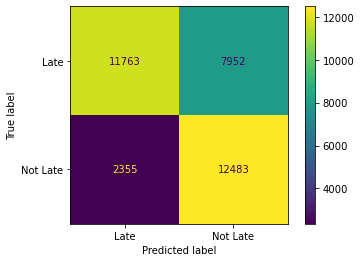

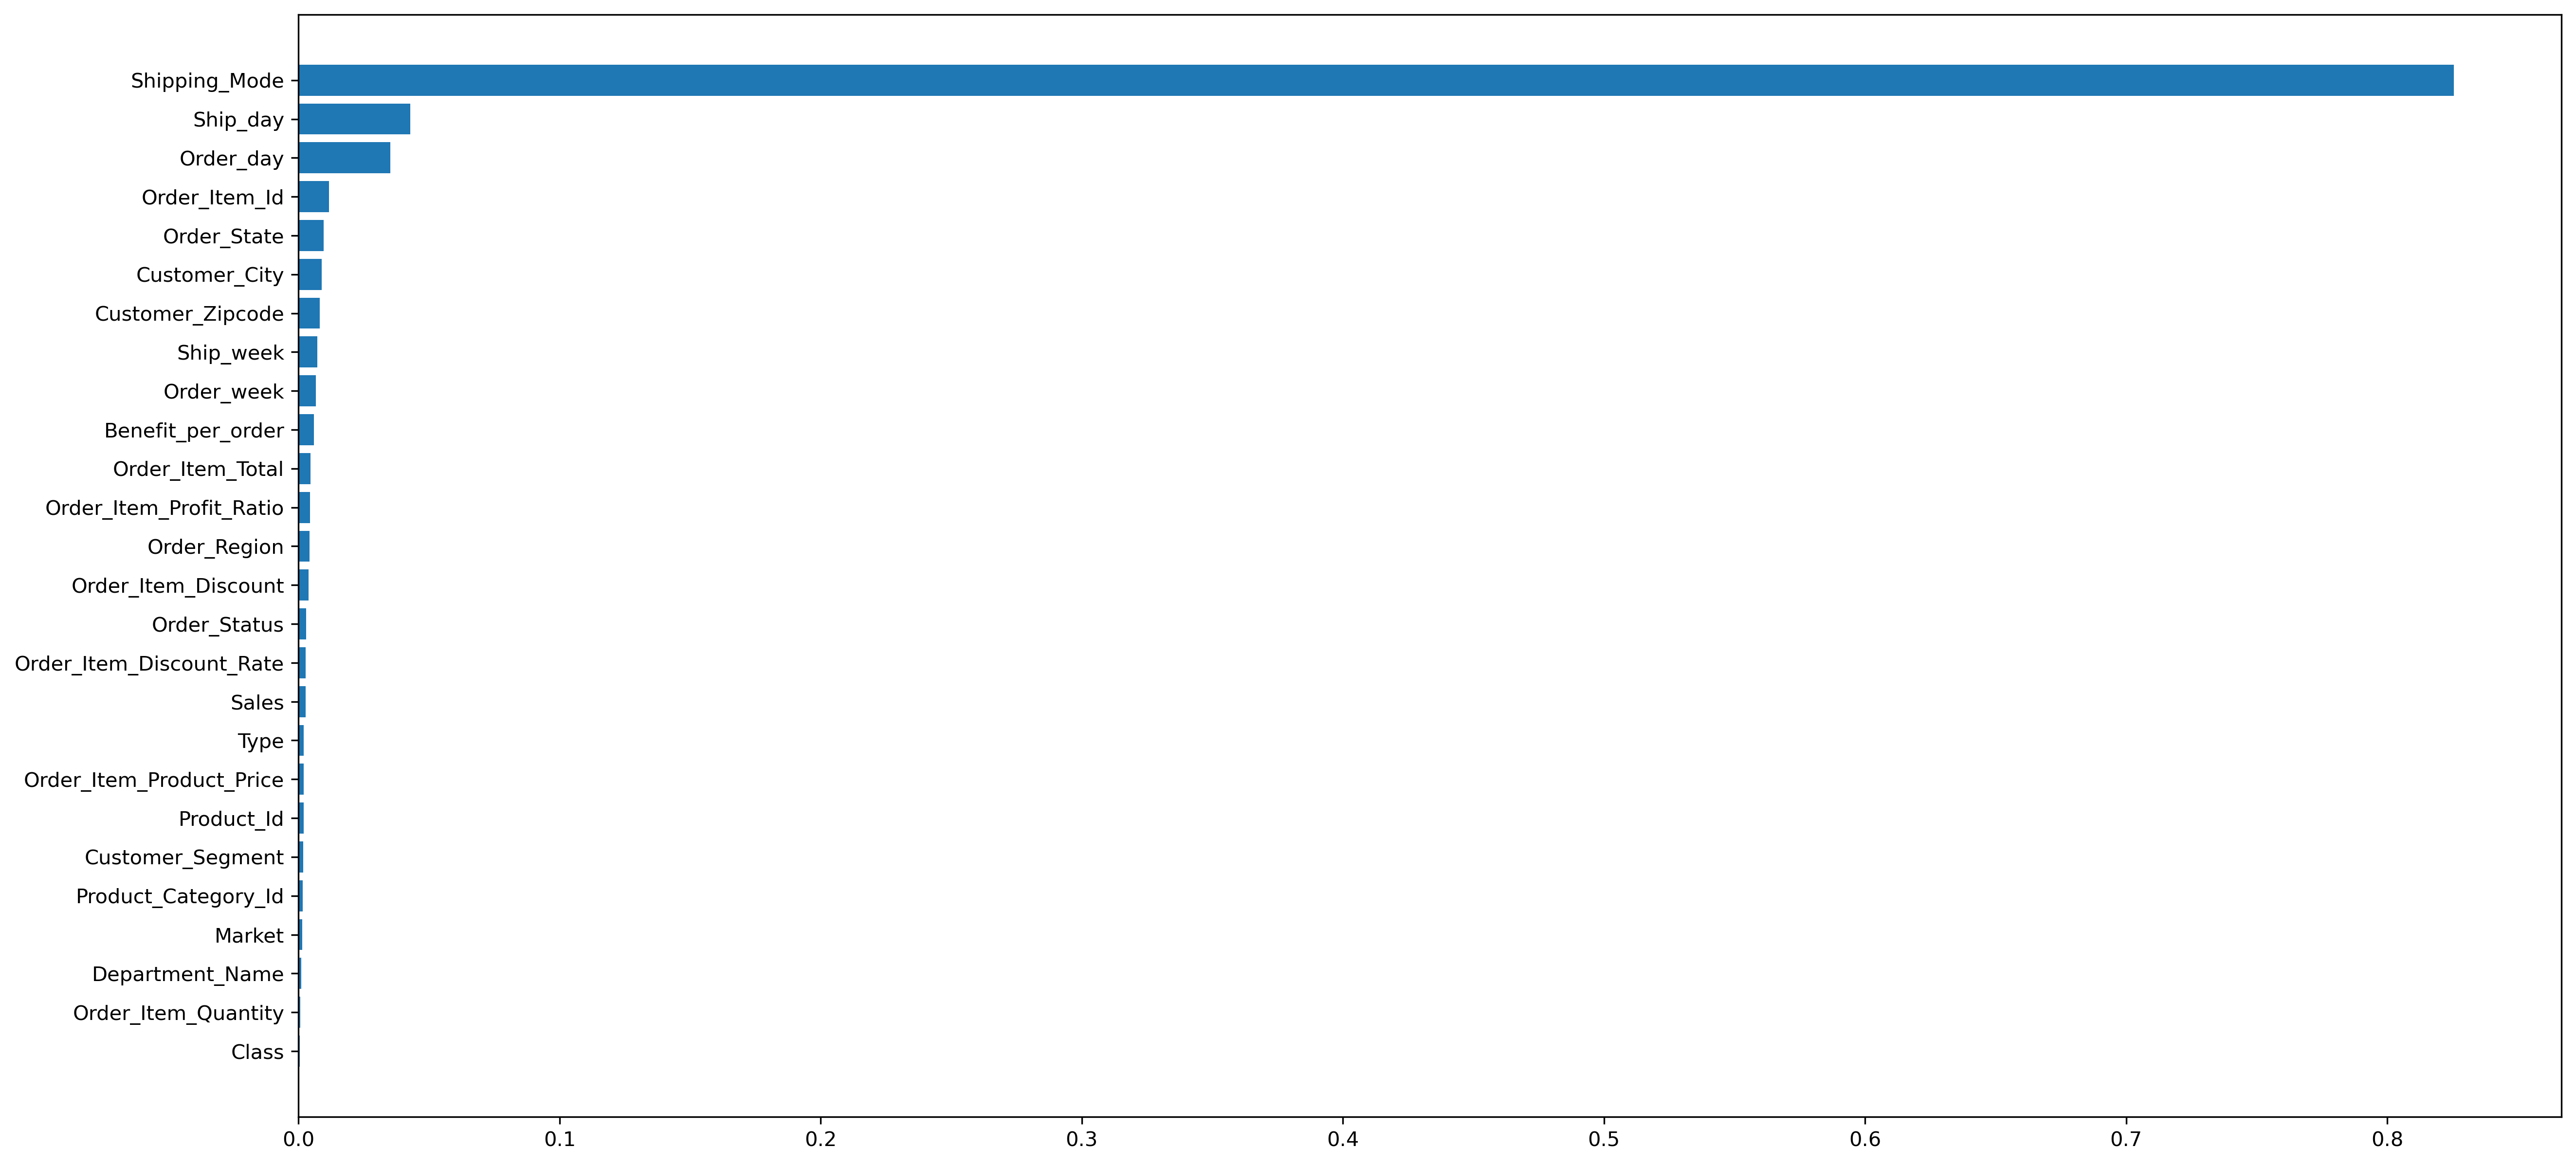

In [26]:
print(metrics.classification_report(y_test, y_pred))

metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show();

# Feature Impotance 
rf_fi = pd.DataFrame({'Features' : x_train.columns ,
                      'Importance' : clf.feature_importances_
                     }).sort_values(by = 'Importance').reset_index(drop = True)

plt.figure(figsize=(20,10), dpi=300)
plt.barh(width = rf_fi.Importance, y = rf_fi.Features)
plt.show()

---